
# Práctica 1
<h4>José María Ramírez González<h4>
<h5>Grado en Ingeniería Informática curso 2021-2022<h5>

---

# Introducción

En la siguiente línea de código, podemos ver los paquetes usados durante el desarrollo de la práctica.

In [ ]:
from math import e, pi, sin, cos
import numpy as np
import matplotlib.pyplot as plt

Usaremos *math* para funciones muy concretas y valores que necesitaremos para ejecutar partes del programa (como son π y $e$).

*numpy* lo usaremos para el manejo y modificación de los datos.

*matplotlib* nos ayudará a mostrar gráficos para visualizar información relevante durante el desarrollo de la práctica.

## Problemas a explorar durante la práctica

Durante el desarrollo de la práctica vamos a trabajar esencialmente con **dos** tipos de problemas:


*   Problemas en los que tenemos una función y queremos minimizarla (Ejercicio 1)
*   Problemas en los que tenemos unos datos y los resultados de aplicarles una determinada función y queremos averiguar qué función hemos aplicado (Ejercicio 2)

A su vez, ambos ejercicios estarán subdivididos en varios apartados que comentaremos en las secciones del texto referentes a los mismos.



## Funciones de interés


Antes de comenzar con la definición concreta y el estudio de los problemas, vamos a introducir unas funciones que usaremos durante el desarrollo de la práctica que nos han sido proporcionadas en el material de la misma.

In [ ]:
def display_figure(rng_val, fun, ws, colormap, title_fig):
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    from mpl_toolkits.mplot3d import Axes3D
    x = np.linspace(-rng_val, rng_val, 50)
    y = np.linspace(-rng_val, rng_val, 50)
    X, Y = np.meshgrid(x, y)
    myFun = np.vectorize(fun, excluded=['X', 'Y'])
    Z = myFun(X,Y)
    fig = plt.figure()
    ax = Axes3D(fig)
    fig.add_axes()
    ax.plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                            cstride=1, cmap=colormap, alpha=.6)
    if len(ws)>0:
        ws = np.asarray(ws)
        min_point = np.array([ws[-1,0],ws[-1,1]])
        min_point_ = min_point[:, np.newaxis]
        ax.plot(ws[:-1,0], ws[:-1,1], myFun(ws[:-1,0], ws[:-1,1]), 'r*', markersize=5)
        ax.plot(min_point_[0], min_point_[1], myFun(min_point_[0], min_point_[1]), 'r*', markersize=10)
    if len(title_fig)>0:
        fig.suptitle(title_fig, fontsize=16)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('F(u,v)')

La primera función se trata de *display_figure*, que se encarga de mostrar la función 3D a optimizar junto con la ruta seguida hasta encontrar el óptimo de la misma.

Esta función ha sido ligeramente modificada debido a que producía tanto un fallo como un *warning*, solucionando ambos con un par de modificaciones que no son relevantes.

In [ ]:
def readData(file_x, file_y):
	# Leemos los ficheros	
	datax = np.load(file_x)
	datay = np.load(file_y)
	y = []
	x = []	
	# Solo guardamos los datos cuya clase sea la 1 o la 5
	for i in range(0,datay.size):
		if datay[i] == 5 or datay[i] == 1:
			if datay[i] == 5:
				y.append(label5)
			else:
				y.append(label1)
			x.append(np.array([1, datax[i][0], datax[i][1]]))
			
	x = np.array(x, np.float64)
	y = np.array(y, np.float64)
	
	return x, y

La función, *read_data*, nos permitirá leer los datos de un archivo y manejarlos como *arrays* de *NumPy*.

In [ ]:
def simula_unif(N, d, size):
	return np.random.uniform(-size,size,(N,d))

La función *simula_unif* nos proporciona una matriz de $N$ datos aleatorios uniformemente distribuidos en el rango $[-size,size]×[-size,size]$ con tantas dimensiones como indique $d$.

---


# Ejercicio 1

Este ejercicio trata sobre la **búsqueda iterativa de óptimos**.

Tendremos varios apartados dentro del ejercicio:
1. Implementación del algoritmo del gradiente descendente.
2. Usar el algoritmo implementado en el apartado anterior para optimizar la función $E(u,v) = (\displaystyle u \cdot v \cdot e^{(-u^2 - v^2)})^2$.
3. Usar el mismo algoritmo sobre la función $f(x,y) = x^2 + 2y^2 + 2sin(2πx)sin(πy)$.
4. Una conclusión global de lo aprendido.

Entraremos más en detalle acerca del contenido de cada apartado en los mismos, que denominaremos $1.x$, siendo $x$ el número que corresponda al subíndice.

---

## Ejercicio 1.1

Este apartado trata de implementar un algoritmo que aproveche el gradiente de una función en un punto para acabar llegando a un mínimo local o global, reduciendo el coste computacional que conllevaría intentar calcular el mínimo directamente, ya que esta implementación se trata de una función **iterativa**.

A continuación, podemos observar la parte del código que se encarga de realizar el gradiente descendiente.

In [ ]:
def gradient_descent(w_ini, lr, grad_fun, fun, epsilon, max_iters):
    iterations = 0  # Fijamos numero de iteraciones actuales a 0, error actual al valor de la función en el punto inicial y declaramos w como la inicial
    w = w_ini
    cost = fun(w[0],w[1])   # Coste inicial al valor de la función
    while iterations < max_iters and cost > epsilon:  # Hasta que no superemos las máximas iteraciones o no lleguemos al valor esperado
        w = w - lr*(grad_fun(w[0],w[1])/np.linalg.norm(grad_fun(w[0],w[1])))   # Actualizamos la w con el gradiente, normalizando
        cost = fun(w[0],w[1])
        iterations+=1

    return w, iterations 

# Igual a la función anterior, solo que devuelve también todos los estados por los que ha pasado w
def gradient_descent_to_draw(w_ini, lr, grad_fun, fun, epsilon, max_iters):
    iterations = 0
    w = w_ini
    all_w = [w]
    cost = fun(w[0],w[1])
    while iterations < max_iters and cost > epsilon:
        w = w - lr*(grad_fun(w[0],w[1])/np.linalg.norm(grad_fun(w[0],w[1])))
        cost = fun(w[0],w[1])
        all_w.append(w)
        iterations+=1

    return tuple((w, iterations, all_w))

Como vemos, tenemos dos versiones de la misma, siendo la única diferencia que una de ellas (*gradient_descent_to_draw*) almacena todos los estados por los que pasa *w* a modo de historial para posteriormente poder visualizar cómo se ha llegado al mínimo usando un gráfico.

Los parámetros que aceptan ambas funciones son los siguientes:


*   *w_ini*: se trata del punto inicial desde el que comenzamos a buscar el mínimo.
*   *lr*: tasa de aprendizaje, la ''velocidad'' a la que nos movemos hacia el mínimo.
*   *grad_fun*: función que nos devuelve el resultado de la derivada de la función a evaluar en un punto dado.
*   *fun*: función a evaluar, que nos devuelve su valor en un punto dado.
*   *epsilon*: límite inferior del error sobre el que seguir ejecutando la función. Si reducimos la función lo suficiente, el error bajará por debajo de *epsilon* y supondremos un resultado aceptable, deteniendo la ejecución del gradiente descendente.
*   *max_iters*: máximas iteraciones que se realizarán del bucle.

Respecto a la toma de decisiones que hemos llevado a cabo a la hora de la implementación, lo único remarcable es haber normalizado el gradiente.

Normalizar el gradiente hace que nuestro gradiente descendente no se adapte a la pendiente del gradiente en el punto, es decir, el gradiente en un punto solo indica la dirección a seguir, dejando que sea el *learning rate* lo que nos dice cuanto avanzamos.


## Ejercicio 1.2

En este apartado se nos pide minimizar la función $E(u,v) = (\displaystyle u \cdot v \cdot e^{(-u^2 - v^2)})^2$ con el gradiente descendente implementado en el apartado 1.1.

A su vez consta de 2 subpartes:


*   Calcular y mostrar la función del gradiente
*   Ejecutar el gradiente descendente y analizar los resultados



Se nos dan los valores a utilizar con la función del gradiente, como serían $η = 0.1$, el punto inicial $(u,v) = (0.5, -0,5)$, $epsilon = 10^{-8}$ y *max\_iters* $= 10000000000$.

Así pues, vamos a definir las funciones y sus derivadas, **necesarias** para la ejecucción del gradiente y continuaremos con la ejecución.

Respecto a las derivadas parciales, no tienen mayor complejidad, ya que es simplemente una composición de funciones tal que quedaría exactamente igual tanto al derivar la $u$ como la $v$, sólo habría que cambiar la variable a la hora de realizar cada derivada, siendo *dEu* la derivad parcial respecto de $u$ y *dEv* la derivada parcial respecto de $v$.



In [ ]:
def E(u,v):
    return pow(u*v*pow(e, -pow(u,2)-pow(v,2)),2)  # Función objetivo

#Derivada parcial de E con respecto a u
def dEu(u,v):
    return (2*(u*v*pow(e, -pow(u,2)-pow(v,2)))*v*pow(e, -pow(u,2)-pow(v,2))+u*v*pow(e, -pow(u,2)-pow(v,2))*(-2*u))
    
#Derivada parcial de E con respecto a v
def dEv(u,v):
    return (2*(u*v*pow(e, -pow(u,2)-pow(v,2)))*u*pow(e, -pow(u,2)-pow(v,2))+u*v*pow(e, -pow(u,2)-pow(v,2))*(-2*v))

#Gradiente de E
def gradE(u,v):
    return np.array([dEu(u,v), dEv(u,v)])

Una vez definida correctamente la función y su gradiente, podemos proceder a la minimización.

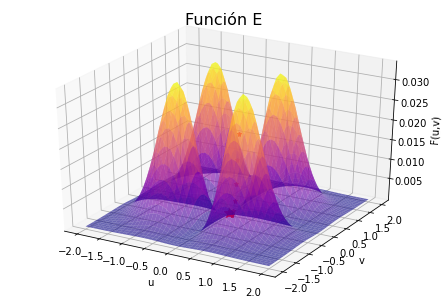

In [ ]:
eta = 0.1 
maxIter = 10000000000
error2get = 1e-8
initial_point_e = np.array([0.5,-0.5])
w_e, it_e, all_w_e = gradient_descent_to_draw(initial_point_e, eta, gradE, E, error2get, maxIter)

display_figure(2, E, all_w_e, 'plasma', 'Función E')
plt.show()

Para que se pueda visualizar mejor la gráfica, vamos a incluir una foto desde otra posición evitando así el tener que implementar gráficos interactivos.

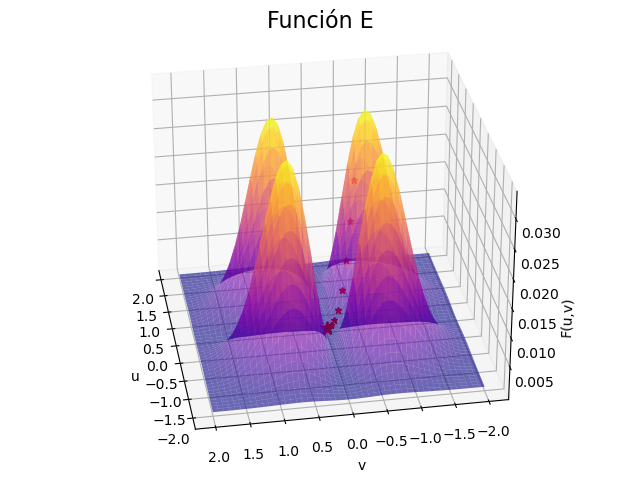

Si seguimos ejecutando el programa, veremos el número de iteraciones y el mínimo al que llegamos con la ejecución

In [ ]:
print ('Numero de iteraciones: ', it_e)
print('Punto asociado: ', E(w_e[0],w_e[1]))
print ('Coordenadas obtenidas: (', w_e[0], ', ', w_e[1],')')

Numero de iteraciones:  7
Punto asociado:  6.376581507796766e-10
Coordenadas obtenidas: ( 0.005025253169416752 ,  -0.005025253169416752 )


A la vista de los resultados y la gráfica, vemos que el punto inicial se encontraba en una especia de "montaña", desde la que gracias al gradiente descendente vamos bajando poco a poco hasta llegar al mínimo en el punto $(0.005025253169416752 ,  -0.005025253169416752)$.

Este recorrido toma tan sólo 7 iteraciones, teniendo en cuenta el *learning rate* de 0.1. Si hubiéramos puesto una tasa de aprendizaje más baja, habría tardado más iteraciones en llegar.

## Ejercicio 1.3

En este apartado tenemos que considerar la función $f(x,y) = x^2 + 2y^2 + 2sin(2πx)sin(πy)$ y realizar lo siguiente:


*   Calcular el gradiente, al igual que en la anterior.
*   Minimizar la función usando $η=0.1$ y $η=0.01$ y comparar los resultados obtenidos.
*   Realizar un estudio acerca de cómo afecta el punto inicial y η en la eficacia del gradiente descendente.


Vamos a comenzar definiendo la función y el gradiente.



In [ ]:
def F(u,v):
    return (pow(u,2) + 2*pow(v,2) + 2*sin(2*pi*u)*sin(pi*v))  # Función objetivo

#Derivada parcial de F con respecto a u
def dFu(u,v):
    return (2*u+2*cos(2*pi*u)*sin(pi*v)*2*pi)
    
#Derivada parcial de F con respecto a v
def dFv(u,v):
    return (4*v + 2*sin(2*pi*u)*cos(pi*v)*pi)

#Gradiente de F
def gradF(u,v):
    return np.array([dFu(u,v), dFv(u,v)])

Una vez definida la función y su gradiente, vamos a ver la dependencia de η, ejecutando dos veces la misma función y dibujando un gráfico en el que se observe el avance.

Numero de iteraciones con lr de 0.01:  50
Coordenadas obtenidas con lr de 0.01: ( -1.2075445641393707 ,  0.5704070298021737 )
Numero de iteraciones con lr de 0.1:  50
Coordenadas obtenidas con lr de 0.1: ( -1.302736725346347 ,  0.41179830179912025 )


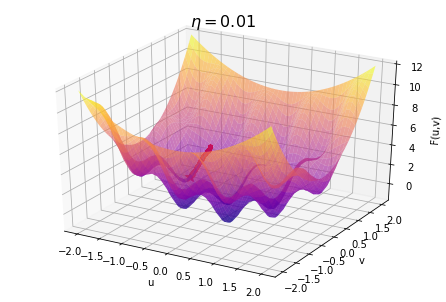

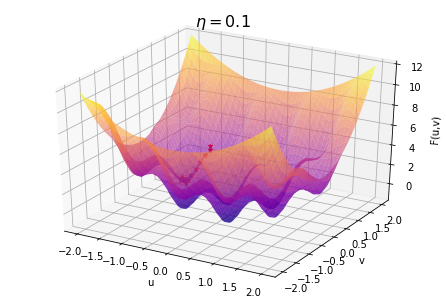

In [ ]:
eta_1 = 0.01    # Establecemos los lr para las 2 pruebas a realizar, al igual que las máximas iteraciones
eta_2 = 0.1
maxIter = 50
error2get = -100000
initial_point_f = np.array([-1,1])  # Punto inicial

(w_f1, it_f1, all_w_f1) = gradient_descent_to_draw(initial_point_f, eta_1, gradF, F, error2get, maxIter)
print ('Numero de iteraciones con lr de 0.01: ', it_f1)
print ('Coordenadas obtenidas con lr de 0.01: (', w_f1[0], ', ', w_f1[1],')')


(w_f2, it_f2, all_w_f2) = gradient_descent_to_draw(initial_point_f, eta_2, gradF, F, error2get, maxIter)
print ('Numero de iteraciones con lr de 0.1: ', it_f2)
print ('Coordenadas obtenidas con lr de 0.1: (', w_f2[0], ', ', w_f2[1],')')

display_figure(2, F, all_w_f1, 'plasma','$\eta = 0.01$')
display_figure(2, F, all_w_f2, 'plasma','$\eta = 0.1$')
plt.show()

Como podemos observar en las gráficas anteriores, al tener una tasa de aprendizaje menor uno que otro, este último avanza mucho **más rápido** hacia el mínimo, tardando menos "pasos" en llegar al mismo, no obstante, si les damos suficientes iteraciones, ambos llegarán.

Es peligroso aumentar η hacia valores grandes en este tipo de problemas, ya que podemos acabar haciendo un bucle y no llegar al mínimo, dando "saltos" entre posiciones cercanas a este. En este caso particular, no resulta especialmente preocupante en vista a los resultados.


Ahora bien, vamos a estudiar cómo afecta el punto inicial, junto con las tasas de aprendizaje, al funcionamiento del gradiente descendente.

Para ello, vamos definir los siguientes puntos iniciales y η.

In [ ]:
initial_points = [ [-0.5, -0.5], [1, 1], [2.1, -2.1], [-3, 3], [-2, 2]]
etas = [0.01, 0.1]

Vamos a ejecutar la función para todo lo anterior y acabaremos realizando una tabla y comentando los resultados obtenidos.

In [ ]:
for point in initial_points:
    for eta in etas:
        w, it = gradient_descent(point, eta, gradF, F, error2get, maxIter)

        print ('lr de {} y punto inicial {}'.format(eta, point))
        print('Valor asociado: ', F(w[0],w[1]))
        print ('Coordenadas obtenidas con lr de {} y punto inicial {}: ({},{})'.format(eta, point, w[0], w[1]))
        print()

lr de 0.01 y punto inicial [-0.5, -0.5]
Valor asociado:  -1.0355614188045168
Coordenadas obtenidas con lr de 0.01 y punto inicial [-0.5, -0.5]: (-0.7256255848766575,-0.4144655263618329)

lr de 0.1 y punto inicial [-0.5, -0.5]
Valor asociado:  -0.9679487102270723
Coordenadas obtenidas con lr de 0.1 y punto inicial [-0.5, -0.5]: (-0.6882640800823216,-0.4113563580154199)

lr de 0.01 y punto inicial [1, 1]
Valor asociado:  -0.7078614146057491
Coordenadas obtenidas con lr de 0.01 y punto inicial [1, 1]: (0.7378753940224363,0.5816490178239215)

lr de 0.1 y punto inicial [1, 1]
Valor asociado:  -0.8528872084546306
Coordenadas obtenidas con lr de 0.1 y punto inicial [1, 1]: (0.7995328147566388,0.4111650667913948)

lr de 0.01 y punto inicial [2.1, -2.1]
Valor asociado:  7.53203838324993
Coordenadas obtenidas con lr de 0.01 y punto inicial [2.1, -2.1]: (1.8047390768678846,-1.701770869894166)

lr de 0.1 y punto inicial [2.1, -2.1]
Valor asociado:  0.11114583715951176
Coordenadas obtenidas con lr 

 La tabla consistirá de puntos iniciales y las η.

 En cada celda tendremos una tupla de la forma "valor, (punto)".

 Los valores y los puntos serán aproximados para no saturar demasiado la tabla, en caso de necesitar exactitud, siempre podemos revisar la ejecución del programa.
 
 <table>
  <tr>
    <th>Learning rate\Initial points</th>
    <th>(-0.5, -0.5)</th>
    <th>(1, 1)</th>
    <th>(2.1, -2.1)</th>
    <th>(-3, 3)</th>
    <th>(-2, 2)</th>
  </tr>
  <tr>
    <td>0.01</td>
    <td>-1, (-0.72, -0.41)</td>
    <td>-0.7, (0.73, 0.58)</td>
    <td>7.53, (1.8, -1.7)</td>
    <td>21.41, (-3, 2.53)</td>
    <td>6.06, (-1.73, 1.57)</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>-0.96, (-0.68, -0.41)</td>
    <td>-0.85, (0.79, 0.41)</td>
    <td>0.11, (1.28, 0.40)</td>
    <td>3.36, (-2.17, 0.4)</td>
    <td>0.15, (-1.29, 0.4)</td>
  </tr>
</table> 

Como observamos, la tendencia general da mejores resultados con $η = 0.1$, puesto que independientemente del punto inicial, si hemos escogido uno que no sea demasiado bueno, al "avanzar más rápido" podemos corregir la elección del punto.

En lo referente al punto inicial, creo que simplemente mirando los resultados, queda claro que es de vital importancia escoger un punto "bueno", el problema reside en cómo saber cúales son los puntos buenos, ya que a priori no habría forma de saberlo sin estudiar la función en detalle.

Sin embargo, el punto inicial tan solo nos supondría un coste al comenzar, ya que si el resto de parámetros se configuran correctamente, se puede alcanzar un buen mínimo.

El único caso extremo donde el punto inicial puede ser un factor crucial es aquel en el que escogemos un máximo como punto inicial. En ese caso, si que tendríamos un problema, ya que el gradiente nos daría valores muy pequeños, si no 0, lo que puede suponer una efectividad ínfima.

## Ejercicio 1.4


Hablaremos sobre la dificultad real de encontrar un mínimo en una función arbitraria.

A la hora de realizar esta tarea, hay muchos factores que afectan al resultado obtenido, desde el *learning rate* hasta la propia función pasando por el máximo de iteraciones permitido y la elección de epsilon.

Vamos a comentar cómo afectan algunos de estos factores al resultado:


*   La función a minimizar y su gradiente pueden ser realmente complejos de calcular, lo que puede afectar al tiempo de ejecución, obligando a reducir el número de iteraciones todo lo que se pueda, por lo que podríamos no obtener un buen resultado. Este supuesto es un caso poco probable, pero posible.
*   El máximo de iteraciones permitidas también puede afectar, ya que si ponemos un máximo demasiado grande y nuestras condiciones de parada no son correctas, podemos llevar a que la función se siga ejecutando hasta agotar las iteraciones, llevando mucho más tiempo del necesario.
*   La estimación de cuando tenemos un mínimo lo suficientemente bueno también es crucial, ya que si nos quedamos cortos, no habremos explotado totalmente el potencial del gradiente, pero si nos pasamos de optimistas, podríamos acabar en una situación como la descrita en el punto anterior, repitiendo las mismas operaciones en bucle sin avanzar en nuestra búsqueda o llevando mucho más tiempo del necesario.
*   El *learning rate* también es de vital importancia, ya que si lo fijamos en un valor demasiado grande, podemos terminar en un bucle infinito de saltos entre varios puntos de la función, acabando cuando se acaben las iteraciones; pero si lo fijamos en un valor demasiado pequeño, podemos tardar más iteraciones de la cuenta en encontrar nuestro mínimo, suponiéndonos una pérdida de tiempo que puede llegar a ser muy significativa o, en su defecto, agotando el número máximo de iteraciones si haber llegado al mínimo.
*   El punto inicial nos puede facilitar o dificultar la elección de los factores anteriores, ya que si partimos de un punto medianamente bueno, vamos a tener más margen a la hora de fijar, por ejemplo, el *learning rate* que si partimos de uno extremadamente malo. Hay que destacar también que, al guiarse por el gradiente, si estamos en un punto de la función desde el cual no se pueda acceder al mínimo global sin pasar por un tramo ascendente, **nunca** llegaremos al mínimo global y nos quedaremos en un mínimo local.


Ahora bien, podemos concluir que la dificultad real de hallar el mínimo global en una función vendría dada por escoger los valores correctos para todos estos parámetros, ya que si uno de ellos no es el que debería ser, el resultado puede variar en gran medida.

A su vez, a priori no disponemos de datos suficientes como para saber qué valores son los correctos, y es cuestión de ir realizando pruebas hasta dar con unos que funcionen mejor que otros, ya que en gran parte los resultados son dependientes de la función, y habrá valores que funcionen bien para una y que funcionen fatal para otra.

---




# Ejercicio 2


En este ejercicio vamos a **ajustar modelos de regresión lineal**.

Como en el ejercicio 1, tendremos varios apartados:


*   Dado una muestra de datos, con su salida deseada, crear un modelo de regresión que "prediga" la salida deseada.
*   Crear una muestra de datos con una función dada (*simula_unif*, presentada en la introducción del informe) y estudiar la evolución del error al intentar estimar la salida con un modelo de regresión.

Entraremos más en detalle acerca del contenido de cada apartado en los mismos, que denominaremos $2.x$, siendo $x$ el número que corresponda al subíndice.


Antes de comenzar con los apartados expuestos, vamos a exponer las funciones que usaremos a lo largo de este ejercicio.

Vamos a destacar especialmente una de ellas, el **gradiente descendente estocástico**, que hace uso de la otra, *Err*.

Podemos observar el código de ambas en el siguiente fragmento.



In [ ]:
# Funcion para calcular el error, MSE
def Err(x,y,w):
    error = np.sum((y - (x @ w))**2, axis=0)/len(x)
    return error

# Gradiente Descendente Estocastico
# Fuentes: https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1
# https://stackoverflow.com/questions/63518634/stochastic-gradient-descent-implementation-in-python-from-scratch-is-the-implem
def sgd(train_data, lr, y, epsilon, max_iter, batch_size):

    w = np.random.normal(size=len(train_data[0])) # Muestras aleatorias en una distribución Gaussiana para los pesos al inicio
    iterations = 0
    Ein = Err(train_data,y,w)       # El error se calcula en función de los pesos, train e y

    while Ein > epsilon and iterations < max_iter:

        indices = np.random.choice(np.arange(len(y)), size=batch_size, replace=False) # Tomamos como indices valores aleatorios, sin repetición por el replace=False
        shuffled_train, shuffled_y = train_data[indices], y[indices]
        

        prediccion = shuffled_train @ w #Multiplicación de matrices, tal que el resultado es un vector de predicciones por cada conjunto de datos

        # Aplicamos la formula para el cálculo del gradiente, haciendo un reshape para que se multipliquen los valores correctamente y 
        #marcando el eje a lo largo del cual hacemos el sumatorio
        gradiente_w = (2/batch_size)*np.sum((prediccion- shuffled_y).reshape(-1,1) * shuffled_train, axis=0) 

        w -= lr*gradiente_w # Actualizamos los pesos
            
        Ein = Err(train_data,y,w)   # Calculamos el error de nuevo
        
        iterations+=1

        if Ein < epsilon:   # Si cumplimos el requisito, salimos
            break
    
    return w    # Tan solo devolvemos los pesos

Vamos a exponer el funcionamiento del mismo.

Por un lado, *Err* recibe simplemente el vector de pesos ($w$ de ahora en adelante), los datos y la salida esperada. Con estos datos se calcula el error medio cuadrático *MSE*, una medida que se ha demostrado empíricamente que funciona bien para este tipo de problemas.



Respecto a *sgd*, recibimos los siguientes parámetros:


*   *train_data*: Datos que usaremos para el entrenamiento la función de regresión.
*   *lr*: *learning rate*, lo mismo que para el gradiente descendente.
*   *y*: Salidas esperadas para los datos de *train_data*.
*   *epsilon*: igual que para el gradiente descendente.
*   *max_iter*: Número máximo de iteraciones que permitimos.
*   *batch_size*: Tamaño del batch, es decir, tamaño de los grupo de elementos excluyentes en los que separaremos *train_data* para ajustar nuestra función de regresión.

Al comenzar, inicializamos $w$ a valores aleatorios dentro de una distribución gaussiana, el error *Ein* al valor actual.

Entramos en el bucle y, por cada iteración, primero cogemos nuevos valores para la muestra de x e y, denomidados *shuffled_x* y *shuffled_y* respectivamente, con ayuda de la función de *Numpy.random* *choice*, a la cual le pasamos por parámetros el rango de valores disponibles, el tamaño que queremos (*batch_size*) y configurado para que no repita los grupos de índices que devuelve (*replace=False*), luego calculamos el gradiente para el *minibatch* actual y actualizamos $w$ (con el *learning rate* y el gradiente) y Ein con el nuevo $w$.
También actualizamos la variable *iterations*.

Cabe destacar que estamos realizando constantemente operaciones matriciales con el operador *@* y sumatorias con *np.sum*, ahorrando tanto en tiempo de ejecución como en líneas de código, aunque puede resultar un poco más complicado seguir el hilo del mismo. Es importante tener en cuenta que tanto *shuffled_train* como *shuffled_y* son matrices.


Una vez finalizada la ejecución, devolvemos $w$, que es lo que nos resulta de utilidad.


Antes de optar por esta implementación, hacíamos más uso de la función *np.dot* a la hora del cálculo matricial, pero debido a unos tiempos de ejecución pésimos, decidimos refactorizar el código, prescindiendo de operaciones de este tipo y sustituyéndolas por operaciones del tipo *@*.
A su vez, también barajábamos los *minibatches* haciendo uso de la librería *random*, pero esto suponía, al igual que *np.dot*, que aumentara de forma descabellada el tiempo de ejecución, por lo que intercambiamos *random.shuffle* por *np.random.choices*, la cual nos devuelve una lista de índices que usamos para tomar los minibatches.

Estas dos decisiones de diseño comentadas en el párrafo anterior, han supuesto un ahorro de casi 7 minutos en la ejecución del ejercicio 2.2, pasando de unos 8 minutos a unos 30 segundos, que, teniendo en cuenta las 1000 iteraciones y las enormes muestras que generamos, es un aumento de velocidad bastante remarcable.

Podemos observar las fuentes en las que nos hemos basado para crear nuestro código en el mismo, comentado antes de la declaración de la función.


---



## Ejercicio 2.1


En este apartado, usando la función *read_data* expuesta en la introducción, tenemos que leer los datos de unos ficheros previamente proporcionados que incluyen vectores de características de dígitos manuscritos.

Tan solo nos quedamos con los dígitos '1' y '5' y dos características concretas: el nivel medio de gris y el nivel de simetría respecto al eje vertical.

Una vez hecho esto, tendremos que ajustar un modelo de regresión mediante el Gradiente Descendente Estocástico para diferenciar ambos dígitos en función de estas características.
A su vez, se implementará la inversa de Moore-Penrose, o pseudoinversa, una aproximación analítica al problema pero de alto coste computacional.

Una vez se haya ajustado el modelo con ambos métodos, se compararán en una gráfica y se comentarán los resultados.

Para comenzar, vamos a leer los datos y ponerle las etiquetas '1' y '-1' a los dígitos.

In [ ]:
label5 = 1
label1 = -1

nombreCarpeta = 'datos'    # Cambiar con el nombre de la carpeta donde tenemos los datos
# Lectura de los datos de entrenamiento
x, y = readData(nombreCarpeta+'/X_train.npy', nombreCarpeta+'/y_train.npy')
# Lectura de los datos para el test
x_test, y_test = readData(nombreCarpeta+'/X_test.npy', nombreCarpeta+'/y_test.npy')

Vamos también a definir el cálculo de la pseudoinversa, usando la descomposición en valores singulares de la matriz de características, como hemos visto en las tranparencias de clase, no requiriendo mayor explicación.

Podemos ver la implementación en la siguiente celda de código.

In [ ]:
def pseudoinverse(x,y):
    x_t = np.matrix.transpose(x)
    U_x, D_x, V_t_x = np.linalg.svd(x)  # Importante, la matriz diagonal D_x nos viene en forma de array, pasar a matriz con np.diag()
    VDDVt = np.dot(np.dot(np.dot(V_t_x.T,np.diag(D_x)),np.diag(D_x)),V_t_x)
    w = np.dot(np.dot(np.linalg.inv(VDDVt),x_t),y)
    return w

Una vez leídos los datos y definida la pseudoinversa, vamos a ejecutar ambas funciones y a estudiar la bondad del ajuste para cada una.


In [ ]:
w_s = sgd(x, 0.02, y, 1e-4, 200, 64)
print ('Bondad del resultado para grad. descendente estocastico:\n')
print ("Ein: ", Err(x,y,w_s))
print ("Eout: ", Err(x_test, y_test, w_s))

w_p = pseudoinverse(x,y)
print ('\nBondad del resultado para pseudoinversa:\n')
print ("Ein: ", Err(x,y,w_p))
print ("Eout: ", Err(x_test, y_test, w_p))

Bondad del resultado para grad. descendente estocastico:

Ein:  0.07947516493622703
Eout:  0.1314027220991689

Bondad del resultado para pseudoinversa:

Ein:  0.07918658628900395
Eout:  0.13095383720052586


Como vemos, en el Gradiente Descendente Estocástico, hemos limitado a 200 iteraciones (bastante pocas), un *minibatch* de 64 y un *learning rate* de 0.02.

Los resultado, como podemos apreciar, son bastante buenos.

Como ya sabemos, la pseudoinversa resuelve el problema de forma analítica, por lo que es normal que nos de mejores resultados. En este caso concreto, el coste computacional de su cálculo es bajo, puesto que no tenemos muchas características de entrada, por lo que sería la mejor opción.

No obstante, para realizar tan sólo 200 iteraciones y con un η relativamente bajo, el ajuste obtenido es bastante similar al de la pseudoinversa.

Vamos a visualizar los datos junto a la forma en la que clasificamos los mismos para visualizar mejor el ajuste.

Ejecutando la siguiente celda de código, obtendremos los puntos de *train* y *test*, junto con la línea que usamos para clasificar según los datos de entrada, tanto del *sgd* como de la pseudoinversa.

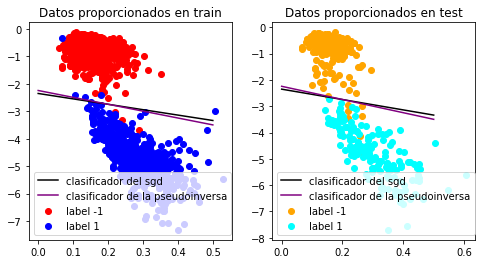

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, title="Datos proporcionados en train")    # Con los datos que nos proporcionan en train y test y la línea que define al sgd y la pseudoinversa
plt.scatter(x[np.where(y == -1), 1], x[np.where(y == -1), 2], c="red", label="label -1")
plt.scatter(x[np.where(y == 1), 1], x[np.where(y == 1), 2], c="blue", label="label 1")

t_train = np.arange(0,np.amax(x),0.5)
plt.plot(t_train, -w_s[0]/w_s[2]-w_s[1]/w_s[2]*t_train, 'black', label="clasificador del sgd")
plt.plot(t_train, -w_p[0]/w_p[2]-w_p[1]/w_p[2]*t_train, 'purple', label="clasificador de la pseudoinversa")
plt.legend()

ax = fig.add_subplot(1, 2, 2, title="Datos proporcionados en test")
plt.scatter(x_test[np.where(y_test == -1), 1], x_test[np.where(y_test == -1), 2], c="orange", label="label -1")
plt.scatter(x_test[np.where(y_test == 1), 1], x_test[np.where(y_test == 1), 2], c="cyan", label="label 1")

t_test = np.arange(0,np.amax(x_test),0.5)
plt.plot(t_test, -w_s[0]/w_s[2]-w_s[1]/w_s[2]*t_test, 'black', label="clasificador del sgd")
plt.plot(t_test, -w_p[0]/w_p[2]-w_p[1]/w_p[2]*t_test, 'purple', label="clasificador de la pseudoinversa")
plt.legend()


plt.show()

Como vemos, la pseudoinversa presenta un mejor ajuste, pero el ajuste del *sgd* es muy similar, hasta tal punto de que casi se solapan.

Al tratarse de un gradiente descendente **estocástico**, el resultado puede variar entre ejecuciones, en el caso de que se quisiera siempre el mismo resultado, se podría fijar un parámetro más en la función *sgd* que tomara el valor de la semilla a fijar antes de la ejecución.

## Ejercicio 2.2

En este apartado, con ayuda de la función *simula_unif*, vamos a crear conjuntos de datos y a estudiar el error cuadrático medio, tanto dentro como fuera de los datos de entrenamiento, usando un modelo lineal como vector de características y otro no lineal, comparando ambos.

Lo primero de todo, vamos a crear una muestra aleatoria y a visualizarla para facilitar la comprensión de los datos que nos proporciona.

Para ello, podemos ejecutar la siguiente celda de código.

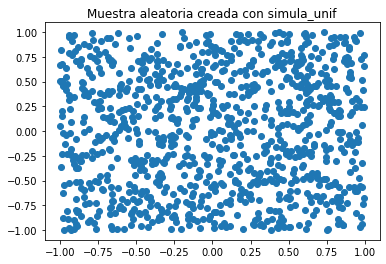

In [ ]:
training_sample = simula_unif(1000,2,1)

plt.scatter(training_sample[:,0], training_sample[:,1])
plt.title("Muestra aleatoria creada con simula_unif")
plt.show()

Como vemos, se trata de puntos en una distribución aleatoria.

Vamos a considerar la función $f(x_1, x_2) = sign((x_1 - 0.2)^2 + x_2^2 - 0.6)$ para asignar una etiqueta a los datos datos.
*sign* es una función proporcionada en el material de la práctica, que realiza una asignación en función del signo que le llega por parámetros.

Para comprender mejor todo esto, podemos observar la siguiente celda de código.

In [ ]:
def sign(x):
	if x >= 0:
		return 1
	return -1

def f(x1, x2):
	return sign((x1-0.2)**2+x2**2-0.6) 

f = np.vectorize(f)

Como vemos, hemos vectorizado la función $f$. Esto facilitará usarla con un array de datos de entrada.

Ahora bien, una vez definida la función, vamos a proceder a realizar un estudio del error medio para dos tipos de ajuste, el primero dejando el vector de características como está (simplemente añadiéndole un 1 al principio para usarlo de *bias*, de forma que quedaría $ϕ_1(x) = (1,x_1,x_2)$), y el segundo, cambiándolo por $ϕ_2(x) = (1, x_1, x_2, x_1x_2, x_1^2, x_2^2)$.

Vamos a calcular primero con $ϕ_1$, y más adelante con $ϕ_2$.

Para realizar ambas pruebas, queremos obtener el error medio, tanto dentro como fuera de la muestra, por lo que realizaremos 1000 veces lo siguiente:


1.   Generar una muestra.
2.   Ajustar con *sgd*.
3.   Calcular $Ein$.
4.   Generar otra muestra.
5.   Calcular $Eout$.

Al final, tendremos 1000 muestras de $Eout$ y otras 1000 de $Ein$, con las que calcularemos el $Ein$ y $Eout$ medios.


Vamos a realizar el cálculo con $ϕ_1$ en la siguiente celda de código.





In [ ]:
AvgEin_linear = 0
AvgEout_linear = 0
for i in range(1000):

    training_sample = simula_unif(1000,2,1)     # Creamos los datos

    func_result = f(training_sample[:,0],training_sample[:,1])
    training_sample = np.array([[1,x[0],x[1]] for x in training_sample])
    
    indices = np.random.choice(len(func_result), size=100, replace=False)      
    func_result[indices] = -func_result[indices]          # Invertimos el valor del 10% de ellos para introducir ruido

    func_weights = sgd(training_sample, 0.05, func_result, 1e-4, 100, 32)

    AvgEin_linear += Err(training_sample, func_result, func_weights)/1000

    training_sample = simula_unif(1000,2,1) # Creamos nuevos datos para Eout
    func_result = f(training_sample[:,0],training_sample[:,1])
    training_sample = np.array([[1,x[0],x[1]] for x in training_sample])

    AvgEout_linear += Err(training_sample, func_result, func_weights)/1000

print("Con características lineales:\n")
print("Ein medio en 1000 muestras: {}\n".format(AvgEin_linear))
print("Eout medio en 1000 muestras: {}\n".format(AvgEout_linear))

Con características lineales:

Ein medio en 1000 muestras: 0.9293610172700486

Eout medio en 1000 muestras: 0.9022349843642388



Como vemos, el error tanto dentro como fuera de la muestra es extremadamente grande si usamos el vector $ϕ_1$.

Vamos a ver el resultado de usar el vector de características $ϕ_2$ en la siguiente celda de código, y compararemos los resultados obtenidos.

In [ ]:
AvgEin_nonLinear = 0
AvgEout_nonLinear = 0
for i in range(1000):

    training_sample = simula_unif(1000,2,1)     # Creamos los datos

    func_result = f(training_sample[:,0],training_sample[:,1])
    training_sample = np.array([[1,x[0],x[1],x[0]*x[1],x[0]*x[0],x[1]*x[1]] for x in training_sample])  # Reformateamos la lista de entrenamiento de tal forma que el primer elemento de cada objeto sea 1
    
    indices = np.random.choice(len(func_result), size=100, replace=False)      
    func_result[indices] = -func_result[indices]          # Invertimos el valor del 10% de ellos para introducir ruido

    func_weights = sgd(training_sample, 0.05, func_result, 1e-4, 100, 25)

    AvgEin_nonLinear += Err(training_sample, func_result, func_weights)/1000

    training_sample = simula_unif(1000,2,1)
    func_result = f(training_sample[:,0], training_sample[:,1])
    training_sample = np.array([[1,x[0],x[1],x[0]*x[1],x[0]*x[0],x[1]*x[1]] for x in training_sample]) # Creamos nuevos datos para Eout

    AvgEout_nonLinear += Err(training_sample, func_result, func_weights)/1000

print("Con características no lineales:\n")
print("Ein medio en 1000 muestras: {}\n".format(AvgEin_nonLinear))
print("Eout medio en 1000 muestras: {}\n".format(AvgEout_nonLinear))

Con características no lineales:

Ein medio en 1000 muestras: 0.7046265663942745

Eout medio en 1000 muestras: 0.5838965993469878



Como vemos, ambas celdas de código son bastante similares, a excepción de la *list comprehension* usada para generar *training_sample* después de obtener las etiquetas, pero siempre lo pasamos a *np.array*, ya que con este tipo de dato se puede trabajar más cómodamente.

Al usar $ϕ_2$, el error dentro y fuera de la muestra se reduce considerablemente.

Esto puede deberse a que la función que estamos usando para clasificar los elementos tenga un alto grado no lineal. Mientras que para $ϕ_1$ sólo usamos las coordenadas de las muestras, pero añadiendo un $1$ al principio de cada una, para $ϕ_2$ si que añadimos más características al multiplicar las coordenadas de los puntos, entre otras.

Podemos ver una clasificación de la muestra (que no de nuestra clasificación de la misma) en la siguiente celda de código.

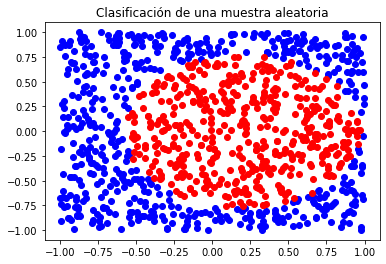

In [ ]:
training_sample = simula_unif(1000,2,1)

results = f(training_sample[:,0], training_sample[:,1])


plt.scatter(training_sample[np.where(results == 1),0], training_sample[np.where(results == 1),1], c='b')
plt.scatter(training_sample[np.where(results == -1),0], training_sample[np.where(results == -1),1], c='r')
plt.title("Clasificación de una muestra aleatoria")
plt.show()

Como podemos observar en la gráfica anterior, la división de elementos se produce en una elipse concreta, eso explica que nuestro vector de características no lineal se comporta mejor que el lineal.

Debido a este factor a la hora de clasificar los elementos, esta función resultará especialmente difícil de ajustar sin el vector de características adecuado.

# Conclusión

A lo largo de esta práctica, hemos aprendido a encontrar el mínimo de funciones arbitrarias y a ajustar modelos de regresión en función de unos datos de entrada y una salida esperada.

A su vez, hemos estudiado la dificultad de realizar estas dos cosas, de forma eficiente, junto con posibles aplicaciones prácticas y casos extremos.

Al desarrollar nosotros mismos las funciones, y no usar las librerías en las que vienen implementadas, también hemos alcanzado un mayor grado de comprensión sobre el funcionamiento de estas técnicas, al igual que una mayor soltura con librerías como *matplotlib* y *numpy*, las cuales usaremos durante todo el desarrollo de la asignatura.